# ch05.06. 기초모델 구현 - Linear Regression
---
* 날짜: 2022-05-17
* 이름: 고민수

## 학습내용
    -  선형회귀의 프로세스에 대해 이해한다

```
import numpy as np
import matplotlib.pyplot as plt
```

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 클래스 작성
---

In [9]:
class LinearRegressionGD():
    
    def __init__(self, lr=0.001, random_state=1):
        self.lr=lr
        self.seed = np.random.RandomState(random_state)

    def init_weights(self, X):
        size = X.shape[1]
        self.w = self.seed.normal(0,0.01,size = size+1)

    def model(self, X):
        return np.dot(X, self.w[:-1]) + self.w[-1]

    def loss(self, y, y_hat):
        Loss = (y-y_hat)**2
        Loss = 1/2*np.sum(Loss)/ len(y) 
        return Loss

    def evaluate(self, X, y):
        y_hat = self.model(X)
        loss = self.loss(y, y_hat) # 손실평균
        return loss

    def fit(self, X, y, epochs=10, show_params=False):

        self.init_weights(X) # 가중치 초기화
        self.history=dict(loss=[]) # history 초기화

        for epoch in range(epochs):
            # 최적화
            y_hat = self.model(X)
            
            self.w[:-1] = self.w[:-1] + self.lr * np.dot(X.T , (y-y_hat))
            self.w[-1] = self.w[-1] + self.lr * np.sum(y-y_hat)

            # 평가 및 결과 저장
            loss = self.evaluate(X, y)
            self.history['loss'].append(loss)
            if show_params: print(self.w)
                
            # 100 iter 마다 cost 출력
            if epoch % 100 == 0:
                print(f'[Epoch {epoch}] loss: {np.round(loss,2)}')

    # 데이터 흐름 시각화
    def draw_dflow(self, X, y, title='', figsize=(8,4)):
        y_hat = self.model(X)
        
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(y, label='y', marker='o')
        plt.plot(y_hat, label='$\hat{y}$', marker='.', linestyle='--')
        plt.legend()
        plt.show()

    # 학습 곡선 시각화
    def draw_lcurve(self, title='', figsize=(8,4)):
        plt.figure(figsize=figsize)
        plt.title(title)
        plt.plot(self.history['loss'], label='loss', marker='o')
        plt.xlabel('epoch')
        plt.legend()
        plt.show()

## mpg 데이터로 선형 회귀 진행하기
---

### **데이터 로드**

In [5]:
import seaborn as sns
from sklearn.model_selection import train_test_split
  
def mpg_loader(test_size=0.2, rs=1):
    df = sns.load_dataset('mpg')
    print('===== 데이터 확인 ====')
    print('* shape: ',df.shape)
    print(df.head())

    print('===== 범주 자료 제거 ====')
    df = df.drop(['origin', 'name'], axis=1)
    print('* shape: ',df.shape)

    print('===== 결측치 제거 ====')
    df = df.dropna(axis=0)
    print('* shape: ',df.shape)

    print('===== 정규화 ====')
    df=df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
    print(df.head())

    print('===== 넘파이 변환 ====')
    ds = df.to_numpy()
    X, y = ds[:, 1:], ds[:, 0]
    print(X.shape, y.shape)

    print('===== 데이터 분할 ====')

    X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=rs)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = mpg_loader()

===== 데이터 확인 ====
* shape:  (398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
===== 범주 자료 제거 ====
* shape:  (398, 7)
===== 결측치 제거 ====
* shape:  (392, 7)
===== 정규화 ====
        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.697747   1.482053      1.075915    0.663285  0.619748     -1.283618   

In [28]:
import pandas as pd
pd.DataFrame(X_train)

,0,1,2,3,4,5
0,0.309571,0.053400,-0.505815,0.108801,0.419982,0.548467
1,1.482053,1.486832,1.312785,1.627515,-0.232460,0.819931
2,-0.862911,-0.930889,-0.427875,-0.822442,1.253659,-0.808850
3,-0.862911,-0.519972,-0.843554,-0.485735,-0.703669,0.005540
4,0.309571,0.359199,-0.116115,-0.038361,0.166254,-0.808850
...,...,...,...,...,...,...
289,-0.862911,-0.930889,-0.765614,-0.968427,0.311242,0.005540
290,0.309571,0.359199,-0.375915,0.273623,0.601216,0.548467
291,1.482053,1.075915,0.663285,1.319063,-0.558682,-1.080314
292,-0.862911,-0.921333,-1.077374,-1.090866,0.528722,0.277004


### **학습전 성능 평가**

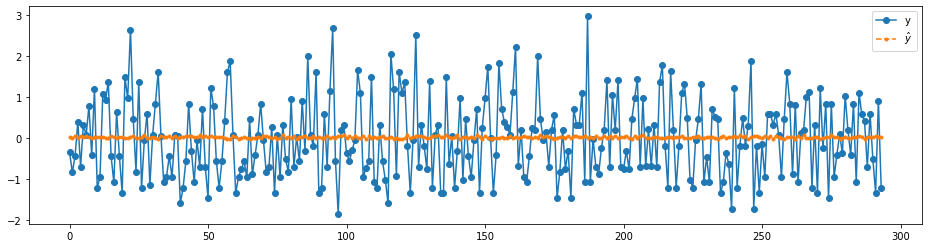

성능:  0.4713780207534153


In [14]:
model = LinearRegressionGD(lr=0.0001)

model.init_weights(X_train)
model.draw_dflow(X_train, y_train, figsize=(16,4))
print('성능: ', model.evaluate(X_train, y_train))

### **학습**

In [18]:
history = model.fit(X_train, y_train, epochs=501)

[Epoch 0] loss: 0.38
[Epoch 100] loss: 0.1
[Epoch 200] loss: 0.1
[Epoch 300] loss: 0.1
[Epoch 400] loss: 0.1
[Epoch 500] loss: 0.09


### **학습 후 성능평가**

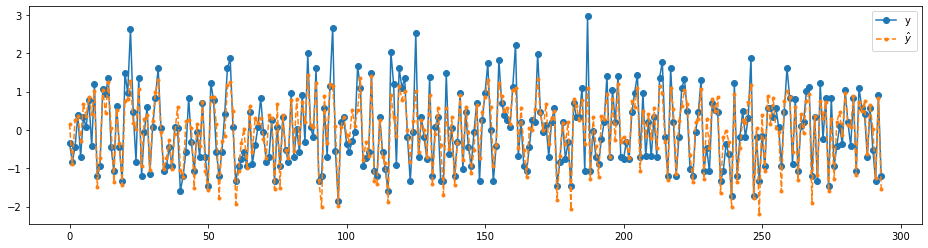

In [19]:
model.draw_dflow(X_train, y_train, figsize=(16,4))

### **학습곡선**

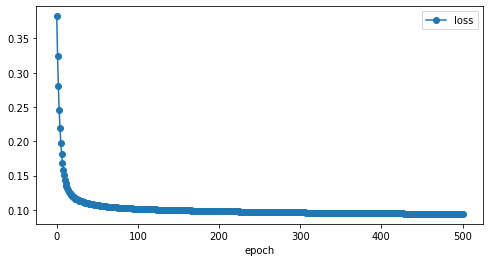

In [20]:
model.draw_lcurve()

### **테스트셋 성능평가**

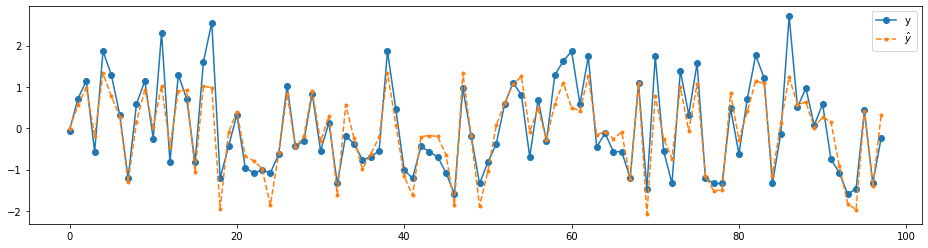

In [21]:
model.draw_dflow(X_test, y_test, figsize=(16,4))

### **하이퍼파라미터에 따른 성능평가**

In [23]:
for lr in [0.00001, 0.0001, 0.001, 0.01, 0.1]:
    model = LinearRegressionGD(lr=lr)
    history = model.fit(X_train, y_train, epochs=501)
    print(f'===== lr {lr} ==== {model.evaluate(X_test, y_test)}')

[Epoch 0] loss: 0.46
[Epoch 100] loss: 0.16
[Epoch 200] loss: 0.12
[Epoch 300] loss: 0.12
[Epoch 400] loss: 0.11
[Epoch 500] loss: 0.11
===== lr 1e-05 ==== 0.1270259736676608
[Epoch 0] loss: 0.4
[Epoch 100] loss: 0.1
[Epoch 200] loss: 0.1
[Epoch 300] loss: 0.1
[Epoch 400] loss: 0.1
[Epoch 500] loss: 0.09
===== lr 0.0001 ==== 0.1070889627744408
[Epoch 0] loss: 0.14
[Epoch 100] loss: 0.09
[Epoch 200] loss: 0.09
[Epoch 300] loss: 0.09
[Epoch 400] loss: 0.09
[Epoch 500] loss: 0.09
===== lr 0.001 ==== 0.10646634364384722
[Epoch 0] loss: 40.26
[Epoch 100] loss: 8.150888776051263e+210
[Epoch 200] loss: inf
[Epoch 300] loss: nan
[Epoch 400] loss: nan
[Epoch 500] loss: nan
===== lr 0.01 ==== nan
[Epoch 0] loss: 4704.77
[Epoch 100] loss: inf
[Epoch 200] loss: nan
[Epoch 300] loss: nan
[Epoch 400] loss: nan
[Epoch 500] loss: nan
===== lr 0.1 ==== nan


C:\Users\user\AppData\Local\Temp\ipykernel_6492\390198211.py:15: RuntimeWarning: overflow encountered in square
  Loss = (y-y_hat)**2
C:\Users\user\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\user\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


* 학습률이 0.001 일때 loss가 가장 적다